## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [ ]:
import numpy as np
import pandas as pd
!pip install tweet-preprocessor
import preprocessor as p
import string 
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stemmer')
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer

import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading stemmer: Package 'stemmer' not found in
[nltk_data]     index


In [ ]:
uploaded = files.upload()
df = pd.read_csv('tweet_emotions.csv')

df.head()

Saving tweet_emotions.csv to tweet_emotions.csv


tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

# pra pengolahan data

In [ ]:
df.describe

<bound method NDFrame.describe of          tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the m

In [ ]:
print(df.describe(include='all'))

            tweet_id sentiment  \
count   4.000000e+04     40000   
unique           NaN        13   
top              NaN   neutral   
freq             NaN      8638   
mean    1.845184e+09       NaN   
std     1.188579e+08       NaN   
min     1.693956e+09       NaN   
25%     1.751431e+09       NaN   
50%     1.855443e+09       NaN   
75%     1.962781e+09       NaN   
max     1.966441e+09       NaN   

                                                  content  final  tweet  \
count                                               40000  40000  40000   
unique                                              39827  39440  38980   
top     I just received a mothers day card from my lov...                 
freq                                                   14     78    105   
mean                                                  NaN    NaN    NaN   
std                                                   NaN    NaN    NaN   
min                                                   NaN    NaN  

In [ ]:
print(df.describe(exclude=['O']))

           tweet_id
count  4.000000e+04
mean   1.845184e+09
std    1.188579e+08
min    1.693956e+09
25%    1.751431e+09
50%    1.855443e+09
75%    1.962781e+09
max    1.966441e+09


In [ ]:
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [ ]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
df.isnull()

tweet_id  sentiment  content
0         False      False    False
1         False      False    False
2         False      False    False
3         False      False    False
4         False      False    False
...         ...        ...      ...
39995     False      False    False
39996     False      False    False
39997     False      False    False
39998     False      False    False
39999     False      False    False

[40000 rows x 3 columns]

In [ ]:
df.notnull()

tweet_id  sentiment  content
0          True       True     True
1          True       True     True
2          True       True     True
3          True       True     True
4          True       True     True
...         ...        ...      ...
39995      True       True     True
39996      True       True     True
39997      True       True     True
39998      True       True     True
39999      True       True     True

[40000 rows x 3 columns]

In [ ]:
df.isna()

tweet_id  sentiment  content
0         False      False    False
1         False      False    False
2         False      False    False
3         False      False    False
4         False      False    False
...         ...        ...      ...
39995     False      False    False
39996     False      False    False
39997     False      False    False
39998     False      False    False
39999     False      False    False

[40000 rows x 3 columns]

In [ ]:
df.replace(to_replace = np.nan, value = -99)

tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...  
39999  @mopedronin bullet train from tokyo    the gf ...  

[40000 rows x 3 columns]

In [ ]:
print(df.isnull().values.any())

False


In [ ]:
df['clean_tweet'] = df['content'].replace(regex='(@\w+)|#|&|!',value='')

In [ ]:
df['final']=df.content.apply(lambda x : p.clean(x))
df.head()

tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

                                         clean_tweet  \
0   i know  i was listenin to bad habit earlier a...   
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
3                wants to hang out with friends SOON   
4   We want to trade with someone who has Houston...   

                                               final  
0  i know i was listenin to bad habit earlier and...  
1  Layin n bed with a headache ughhhh...waitin on...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  We want to trade with someone who has Houston ...

In [ ]:
df.final

0        i know i was listenin to bad habit earlier and...
1        Layin n bed with a headache ughhhh...waitin on...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        We want to trade with someone who has Houston ...
                               ...                        
39995                                                     
39996                        Happy Mothers Day All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...
39999    bullet train from tokyo the gf and i have been...
Name: final, Length: 40000, dtype: object

In [ ]:
df["content"][1:10]

1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
5    Re-pinging @ghostridah14: why didn't you go to...
6    I should be sleep, but im not! thinking about ...
7                 Hmmm. http://www.djhero.com/ is down
8              @charviray Charlene my love. I miss you
9           @kelcouch I'm sorry  at least it's Friday?
Name: content, dtype: object

In [ ]:
df['final'][1:10]

1    Layin n bed with a headache ughhhh...waitin on...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    We want to trade with someone who has Houston ...
5    Re-pinging : why didn't you go to prom? BC my ...
6    I should be sleep, but im not! thinking about ...
7                                        Hmmm. is down
8                         Charlene my love. I miss you
9                      I'm sorry at least it's Friday?
Name: final, dtype: object

1. Case Folding

In [ ]:
df['tweet'] = df['content'].str.lower()

print('Hasil Case Folding (Cara pertama) : \n')
print(df['content'].head(5))
print('\n\n\n')

Hasil Case Folding (Cara pertama) : 

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
Name: content, dtype: object






In [ ]:
df['tweet'] = df['final'].str.lower()

print('Hasil Case Folding (Cara Kedua) : \n')
print(df['final'].head(5))
print('\n\n\n')

Hasil Case Folding (Cara Kedua) : 

0    i know i was listenin to bad habit earlier and...
1    Layin n bed with a headache ughhhh...waitin on...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    We want to trade with someone who has Houston ...
Name: final, dtype: object






2. Tokenizing

In [ ]:
def remove_tweet_special(text):

    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    
    text = text.encode('ascii', 'replace').decode('ascii')
    
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    return text.replace("http://", " ").replace("https://", " ")
                
df['tweet'] = df['tweet'].apply(remove_tweet_special)


def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['tweet'] = df['tweet'].apply(remove_number)


def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punctuation)


def remove_whitespace_LT(text):
    return text.strip()

df['tweet'] = df['tweet'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['tweet'] = df['tweet'].apply(remove_whitespace_multiple)

def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['tweet'] = df['tweet'].apply(remove_singl_char)

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tweet_tokens'] = df['tweet'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing : \n') 
print(df['tweet_tokens'].head())
print('\n\n\n')

Hasil Tokenizing : 

0    [know, was, listenin, to, bad, habit, earlier,...
1    [layin, bed, with, headache, ughhhhwaitin, on,...
2                    [funeral, ceremonygloomy, friday]
3          [wants, to, hang, out, with, friends, soon]
4    [we, want, to, trade, with, someone, who, has,...
Name: tweet_tokens, dtype: object






3. Filtering

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
df['filter'] = df['final'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
print(df['filter'].head())

0    know listenin bad habit earlier started freaki...
1         Layin n bed headache ughhhh...waitin call...
2                  Funeral ceremony...gloomy friday...
3                             wants hang friends SOON!
4     We want trade someone Houston tickets, one will.
Name: filter, dtype: object


In [ ]:
df['response'] = df['final'].apply(lambda x: ' '.join([item for item in x.split() if item not in (stop_words)]))
print(df['response'].head())

0    know listenin bad habit earlier started freaki...
1         Layin n bed headache ughhhh...waitin call...
2                  Funeral ceremony...gloomy friday...
3                             wants hang friends SOON!
4     We want trade someone Houston tickets, one will.
Name: response, dtype: object


4. Stemming

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer() 
for w in df.final.head(5):
	rootWord=ps.stem(w)
	print(rootWord)

df['stem'] = df.final.head(5).apply(ps.stem)

i know i was listenin to bad habit earlier and i started freakin at his part =[
layin n bed with a headache ughhhh...waitin on your call...
funeral ceremony...gloomy friday...
wants to hang out with friends soon!
we want to trade with someone who has houston tickets, but no one will.


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer() 
for w in df.final.head(5): 
    print(w, " : ", ps.stem(w)) 

df['stem'] = df.final.head(5).apply(ps.stem)

i know i was listenin to bad habit earlier and i started freakin at his part =[  :  i know i was listenin to bad habit earlier and i started freakin at his part =[
Layin n bed with a headache ughhhh...waitin on your call...  :  layin n bed with a headache ughhhh...waitin on your call...
Funeral ceremony...gloomy friday...  :  funeral ceremony...gloomy friday...
wants to hang out with friends SOON!  :  wants to hang out with friends soon!
We want to trade with someone who has Houston tickets, but no one will.  :  we want to trade with someone who has houston tickets, but no one will.


In [ ]:
df.content

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

# ekstraksi fitur
1. Bag of Words (Count / TF-IDF)
2. N-gram


In [ ]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

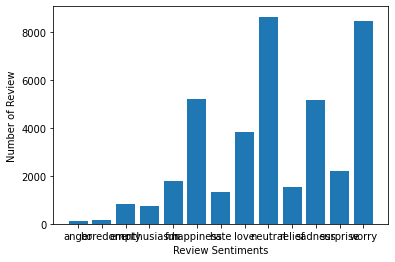

In [ ]:
Sentiment_val=df.groupby('sentiment').count()
plt.bar(Sentiment_val.index.values, Sentiment_val['final'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [ ]:
tfidf_vect = TfidfVectorizer()

text1 = tfidf_vect.fit_transform(df["content"])

In [ ]:
y = df["sentiment"]

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(text1, y, test_size=0.3, random_state=123)

In [ ]:
print(X_train.shape)

(28000, 48212)


In [ ]:
model = SVC()
model.fit(text1,y)

SVC()

In [ ]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         0
     boredom       0.11      1.00      0.20         5
       empty       0.03      0.78      0.05         9
  enthusiasm       0.01      1.00      0.02         2
         fun       0.47      0.99      0.64       253
   happiness       0.88      0.81      0.84      1733
        hate       0.47      0.93      0.62       187
        love       0.80      0.84      0.82      1107
     neutral       0.94      0.67      0.78      3648
      relief       0.32      0.96      0.48       157
     sadness       0.83      0.93      0.88      1358
    surprise       0.39      1.00      0.56       254
       worry       0.95      0.72      0.82      3287

    accuracy                           0.77     12000
   macro avg       0.48      0.82      0.52     12000
weighted avg       0.87      0.77      0.80     12000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test.shape

(12000,)

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['content'])
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['content'])

In [ ]:
unigrams  = (
    df['final'].str.lower()
                .str.replace(r'[^a-z\s]', '')
                .str.split(expand=True)
                .stack())


bigrams = unigrams + ' ' + unigrams.shift(-1)

trigrams = bigrams + ' ' + unigrams.shift(-2)


pd.concat([unigrams, bigrams, trigrams]).dropna().reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0                                            i
1                                         know
2                                            i
3                                          was
4                                     listenin
                          ...                 
1489681                   visiting japan since
1489682                   japan since thursday
1489683     since thursday vacationsightseeing
1489684    thursday vacationsightseeing gaijin
1489685    vacationsightseeing gaijin godzilla
Length: 1489686, dtype: object

Pembuatan Model

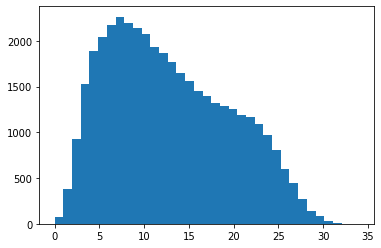

In [ ]:
lengths = [len(t.split()) for t in df.final]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [ ]:
maxlen = 30 
from tensorflow.keras.preprocessing.sequence import pad_sequences

Padding

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding='post', maxlen = maxlen)
  return padded

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt = dt.predict(X_test)
print("Confusion Matrix untuk Decision Tree :")
print(confusion_matrix(y_test,preddt))

Confusion Matrix for Decision Tree :
[[  0   0   0   2   1   1   2   5   5   2   7   1  10]
 [  0   0   3   0   2   4   3   2   9   2   8   0  13]
 [  0   2   2   2   8  21   9  16  95   9  22  11  57]
 [  0   0   3   4  10  32   6  18  65   8  19   7  47]
 [  0   1  10  12  33 111  11  45 122  20  49  22  97]
 [  1   5  16  30  83 388  34 190 368  61 118  68 227]
 [  1   0   5   8   9  26  53  13  76   8  59  19  92]
 [  0   0   4  10  46 240  12 336 189  35  87  42 162]
 [  1   3  36  39  82 277  49 169 971  81 243 122 548]
 [  1   1   4   6  24  74   9  44 110  30  47  24  91]
 [  0   8  12   8  43 119  64  95 307  36 320  72 454]
 [  0   0   5  11  21  99  11  54 188  17  62  39 148]
 [  7   8  26  43  66 210  70 151 543  54 404 121 809]]


In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Embedding(10000, 32, input_length = maxlen),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences = True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
            tf.keras.layers.Dense(6, activation = 'softmax')
        ])      
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 32)            320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 32)           6272      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 343,302
Trainable params: 343,302
Non-trainable params: 0
_________________________________________________________________


evaluasi

In [ ]:
score = round(accuracy_score(y_test,preddt)*100,2)
print("Akurasi Metric :",score)

Akurasi Metric : 24.88


In [ ]:
clf_nb = MultinomialNB()

clf_nb.fit(X_train, y_train)

count_nb_pred = clf_nb.predict(X_test)

count_nb_score = clf_nb.score(X_test, y_test)

print('Total Score NaiveBayes: ', count_nb_score, '\n')
print(confusion_matrix(y_test, count_nb_pred, labels=y.unique()))

Score Total NaiveBayes:  0.284 

[[   0    2    0   92  154    0    2    0    0    4    0    0    0]
 [   0    8    0  216 1313    0    0    0    0    1    0    0    0]
 [   0    0    0   73  141    0    2    0    0    3    0    0    0]
 [   0    5    0 1105 1456    0   21    0    0   34    0    0    0]
 [   0    5    0  425 2059    0   15    0    0    8    0    0    0]
 [   0    1    0  194  426    0   10    0    0   24    0    0    0]
 [   0    2    0  370  601    0  124    0    0   66    0    0    0]
 [   0    0    0  205  315    0    1    0    0   12    0    0    0]
 [   0    2    0   47  320    0    0    0    0    0    0    0    0]
 [   0    1    0  620  829    0   27    0    0  112    0    0    0]
 [   0    1    0    8   37    0    0    0    0    0    0    0    0]
 [   0    0    0  160  290    0    5    0    0   10    0    0    0]
 [   0    0    0    7   29    0    0    0    0    0    0    0    0]]


In [ ]:
labels = np.unique(y_test)
cm =  confusion_matrix(y_test, count_nb_pred, labels=labels)
pd.DataFrame(cm, index=labels, columns=labels)

anger  boredom  empty  enthusiasm  fun  happiness  hate  love  \
anger           0        0      0           0    0          0     0     0   
boredom         0        0      0           0    0          0     0     0   
empty           0        0      0           0    0          4     0     2   
enthusiasm      0        0      0           0    0          3     0     2   
fun             0        0      0           0    0         12     0     1   
happiness       0        0      0           0    0        112     0    27   
hate            0        0      0           0    0          0     0     0   
love            0        0      0           0    0         66     0   124   
neutral         0        0      0           0    0         34     0    21   
relief          0        0      0           0    0         10     0     5   
sadness         0        0      0           0    0          1     0     0   
surprise        0        0      0           0    0         24     0    10   
worry           0        0      0           0    0          8     0    15   

            neutral  relief  sadness  surprise  worry  
anger             7       0        0         0     29  
boredom           8       0        1         0     37  
empty            92       0        2         0    154  
enthusiasm       73       0        0         0    141  
fun             205       0        0         0    315  
happiness       620       0        1         0    829  
hate             47       0        2         0    320  
love            370       0        2         0    601  
neutral        1105       0        5         0   1456  
relief          160       0        0         0    290  
sadness         216       0        8         0   1313  
surprise        194       0        1         0    426  
worry           425       0        5         0   2059

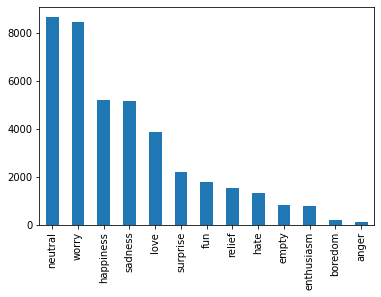

In [ ]:
df.sentiment.value_counts().plot.bar()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt = dt.predict(X_test)
print("Confusion Matrix :")
print(confusion_matrix(y_test,preddt))

Confusion Matrix :
[[  0   0   1   3   1   0   3   4   4   2   9   1   8]
 [  0   0   3   2   3   5   1   1   8   2   9   0  12]
 [  0   3   3   1   7  20  11  16  94  10  25   9  55]
 [  0   0   1   5   7  31   6  16  63   8  21   8  53]
 [  1   2   7  10  36 112  11  47 127  18  43  21  98]
 [  0   2  15  30  77 386  32 185 370  67 115  70 240]
 [  2   0   8   2  11  29  57  11  82   5  61  12  89]
 [  0   0   8  17  44 237  10 334 188  40  83  42 160]
 [  0   6  34  34  76 268  55 167 973  84 257 109 558]
 [  1   0   4  14  21  84   8  49 100  30  43  21  90]
 [  1   7  12  17  35 118  65  88 304  31 333  66 461]
 [  1   1   5  11  29 103  14  57 172  23  59  35 145]
 [  6  13  35  49  68 201  76 156 524  65 413 101 805]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test,preddt))

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        36
     boredom       0.00      0.00      0.00        46
       empty       0.02      0.01      0.01       254
  enthusiasm       0.02      0.02      0.02       219
         fun       0.08      0.06      0.07       533
   happiness       0.24      0.24      0.24      1589
        hate       0.16      0.14      0.15       369
        love       0.30      0.29      0.29      1163
     neutral       0.32      0.37      0.34      2621
      relief       0.08      0.06      0.07       465
     sadness       0.22      0.21      0.21      1538
    surprise       0.07      0.06      0.06       655
       worry       0.29      0.32      0.31      2512

    accuracy                           0.25     12000
   macro avg       0.14      0.14      0.14     12000
weighted avg       0.24      0.25      0.24     12000

